# Predicting Voting Outcomes

## Exploratory_Data_Analysis


In [6]:
# import required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plot stylings
plt.style.use('fivethirtyeight')
%matplotlib inline

# do not display warnings in notebook 
import warnings
warnings.filterwarnings('ignore')

#### Reading Data

In [9]:
# read the input file
data = pd.read_csv("../data/titanic/train.csv")

In [10]:
# display the first rows in the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# get the shape of the dataframe
data.shape

(891, 12)

### Null Value treatment

In [187]:
# check for null values
data.isnull().sum()

#remove null values
data.dropna(axis=0, inplace=True)

# check for null values
data.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

### Value Count plots

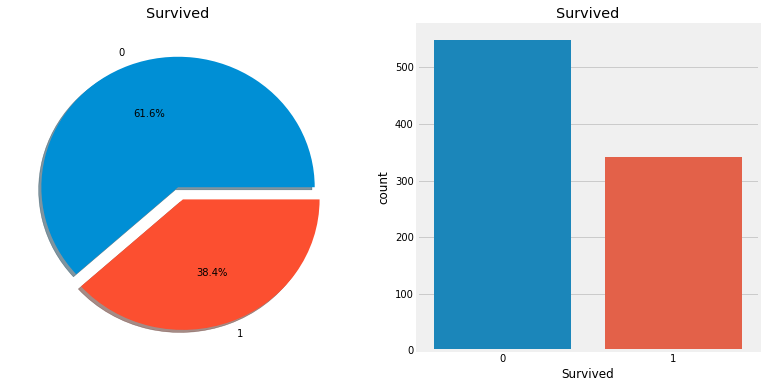

In [13]:
f,ax=plt.subplots(1,2,figsize=(12,6))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## Feature Engineering

## Categorical and Continuous Features

### Categorical Features

#### Categorical Feature - Sex

In [14]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

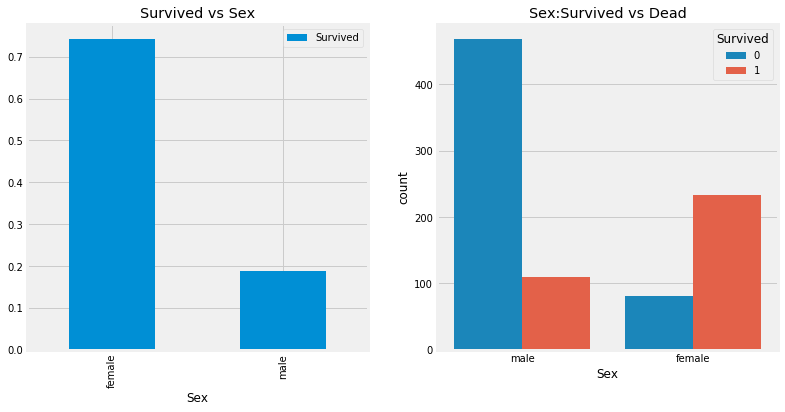

In [15]:
f,ax=plt.subplots(1,2,figsize=(12,6))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

#### Categorical Feature - Pclass

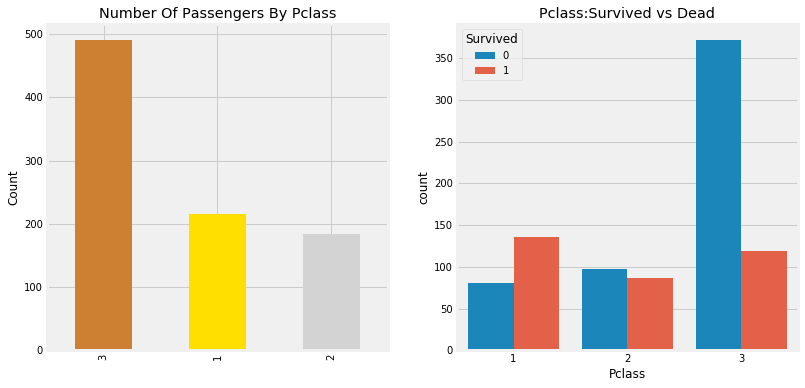

In [18]:
f,ax=plt.subplots(1,2,figsize=(12,6))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [19]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

### Continuous Feature - Age

In [20]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


In [59]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

NameError: name 'plt' is not defined

## Logistic Regression

### Reading the Dataset

In [33]:
# Reading Titanic data using pandas
data = pd.read_csv('../data/titanic/train.csv')

In [34]:
# Removing unnecessary columns
data = data.drop(['Name', 'Ticket', 'Fare', 'Cabin', 'PassengerId'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [35]:
# Finding missing values
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [36]:
# Filling those missing values with mean value of the column
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna('S')
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


## One-Hot Encoding

In [37]:
data = pd.get_dummies(data)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


In [39]:
# Preparing training data and evaluation data
#axis=0->Rows
#axis=1->Columns
train_labels = data['Survived'].values[:600]
train_data = data.drop('Survived', axis=1).values[:600]
eval_labels = data['Survived'].values[600:]
eval_data = data.drop('Survived', axis=1).values[600:]

### **Building the model using Sklearn**

In [40]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True)
clf.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
print ('Accuracy of the model on train data: {0}'.format(clf.score(train_data, train_labels)))

Accuracy of the model on train data: 0.8033333333333333


In [42]:
print ('Accuracy of the model on eval data: {0}'.format(clf.score(eval_data, eval_labels)))

Accuracy of the model on eval data: 0.7903780068728522


Text(0.5,257.44,'Predicted label')

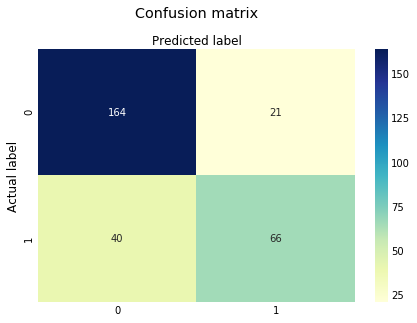

In [43]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
eval_predictions = clf.predict(eval_data)
cm = confusion_matrix(eval_labels, eval_predictions)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [44]:
tn, fp, fn, tp = cm.ravel()
print('True Positives are {}'.format(tp))
print('True Negatives are {}'.format(tn))
print('False Positives are {}'.format(fp))
print('False Negatives are {}'.format(fn))

True Positives are 66
True Negatives are 164
False Positives are 21
False Negatives are 40


In [45]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print(precision, recall)

0.7586206896551724 0.6226415094339622


### ROC Curve

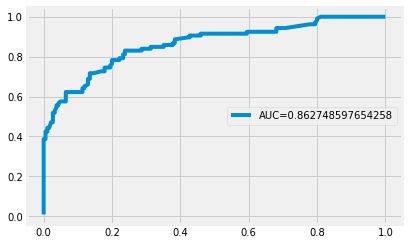

In [46]:
y_pred_proba = clf.predict_proba(eval_data)[::,1]
fpr, tpr, _ = roc_curve(eval_labels, y_pred_proba)
auc = roc_auc_score(eval_labels, y_pred_proba)
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.legend(loc=5)
plt.show()

## Decision Tree Classification

## Classifier Building in Scikit-learn

In [146]:
# Importing required libraries
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import KFold

import re

In [147]:
# Loading the data
train = pd.read_csv('../data/titanic/train.csv')
test = pd.read_csv('../data/titanic/test.csv')

In [148]:
PassengerId = test['PassengerId']

In [149]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [150]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [151]:
orig_train = train.copy()
orig_test = test.copy()

In [152]:
full_data = [train, test]

### Basic Data Processing

In [153]:
# Create dataset copies for basic training without feature engineering
btrain = train.copy()
btest = test.copy()

In [154]:
# Feature that tells if the passenger had a cabin or not
btrain['Has_Cabin'] = btrain['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
btest['Has_Cabin'] = btest['Cabin'].apply(lambda x: 0 if type(x) == float else 1)

In [155]:
# Mapping Sex
btrain['Sex'] = btrain['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
btest['Sex'] = btest['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [156]:
# Remove NULLs in Embarked column
btrain['Embarked'] = btrain['Embarked'].fillna('S')
btest['Embarked'] = btest['Embarked'].fillna('S')

# Mapping Embarked
btrain['Embarked'] = btrain['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
btest['Embarked'] = btest['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [157]:
# Removing columns that aren't required for modeling decision tree
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin']
btrain = btrain.drop(drop_elements, axis = 1)
btest  = btest.drop(drop_elements, axis = 1)

In [158]:
btrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin
0,0,3,1,22.0,1,0,7.2500,0,0
1,1,1,0,38.0,1,0,71.2833,1,1
2,1,3,0,26.0,0,0,7.9250,0,0
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,0


In [159]:
# Removing any rows having NaN values
btrain = btrain.dropna()

### Baseline Model
15% of training dataset will be used as validation set.

In [160]:
# Create Numpy arrays of train, test and target (Survived) dataframes to feed into our models
y_btrain = btrain['Survived']
x_btrain = btrain.drop(['Survived'], axis=1).values
x_btest = btest.values

In [161]:
# Create validation dataset out of training data
bval_share = int(0.15*len(y_btrain))

x_bval = x_btrain[-bval_share:]
y_bval = y_btrain[-bval_share:]

x_btrain = x_btrain[:-bval_share]
y_btrain = y_btrain[:-bval_share]

In [162]:
# Create Decision Tree with default parameters
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(x_btrain, y_btrain)

acc_decision_tree_train = decision_tree.score(x_btrain, y_btrain) * 100
print("Training Accuracy: %0.3f" % acc_decision_tree_train)

acc_decision_tree_val = decision_tree.score(x_bval, y_bval) * 100
print("Validation Accuracy: %0.3f" % acc_decision_tree_val)

Training Accuracy: 98.847
Validation Accuracy: 82.243


In [163]:
# Predicting for validation dataset
y_bpred = decision_tree.predict(x_bval)

# Confusion Matrix
metrics.confusion_matrix(y_bval, y_bpred)

array([[54, 10],
       [ 9, 34]], dtype=int64)

### Final Tree

In [183]:
test=test.drop("Name",axis=1)


In [184]:
print(test)

     PassengerId  Pclass     Sex   Age  SibSp  Parch              Ticket  \
0            892       3    male  34.5      0      0              330911   
1            893       3  female  47.0      1      0              363272   
2            894       2    male  62.0      0      0              240276   
3            895       3    male  27.0      0      0              315154   
4            896       3  female  22.0      1      1             3101298   
5            897       3    male  14.0      0      0                7538   
6            898       3  female  30.0      0      0              330972   
7            899       2    male  26.0      1      1              248738   
8            900       3  female  18.0      0      0                2657   
9            901       3    male  21.0      2      0           A/4 48871   
10           902       3    male   NaN      0      0              349220   
11           903       1    male  46.0      0      0                 694   
12          

In [172]:
# Create Numpy arrays of train, test and target (Survived) dataframes to feed into our models
y_train = train['Survived']
x_train = train.drop(['Survived'], axis=1).values
x_test = test.values

In [173]:
# Create validation dataset out of training data
val_share = int(0.15*len(y_train))

x_val = x_train[-val_share:]
y_val = y_train[-val_share:]

x_train = x_train[:-val_share]
y_train = y_train[:-val_share]

In [174]:
# Create Decision Tree with max_depth = 3
decision_tree = tree.DecisionTreeClassifier(max_depth=3)
decision_tree.fit(x_train, y_train)

acc_decision_tree_train = decision_tree.score(x_train, y_train) * 100
print("Training Accuracy: %0.3f" % acc_decision_tree_train)

acc_decision_tree_val = decision_tree.score(x_val, y_val) * 100
print("Validation Accuracy: %0.3f" % acc_decision_tree_val)

ValueError: could not convert string to float: 'S'

In [116]:
# Predicting results for test dataset
y_pred = decision_tree.predict(x_test)

Predictions = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": y_pred
    })

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
Predictions.head(15)

In [ ]:
## Optimizing Decision Tree Performance

In [108]:
# Create Decision Tree with criterion = entropy
decision_tree = tree.DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(x_train, y_train)

acc_decision_tree_train = decision_tree.score(x_train, y_train) * 100
print("Training Accuracy: %0.3f" % acc_decision_tree_train)

acc_decision_tree_val = decision_tree.score(x_val, y_val) * 100
print("Validation Accuracy: %0.3f" % acc_decision_tree_val)

NameError: name 'x_train' is not defined

In [ ]:
# Create Decision Tree with splitter = random
decision_tree = tree.DecisionTreeClassifier(splitter='random')
decision_tree.fit(x_train, y_train)

acc_decision_tree_train = decision_tree.score(x_train, y_train) * 100
print("Training Accuracy: %0.3f" % acc_decision_tree_train)

acc_decision_tree_val = decision_tree.score(x_val, y_val) * 100
print("Validation Accuracy: %0.3f" % acc_decision_tree_val)

In [ ]:
# Create Decision Tree with max_depth = 4
decision_tree = tree.DecisionTreeClassifier(max_depth=4)
decision_tree.fit(x_train, y_train)

acc_decision_tree_train = decision_tree.score(x_train, y_train) * 100
print("Training Accuracy: %0.3f" % acc_decision_tree_train)

acc_decision_tree_val = decision_tree.score(x_val, y_val) * 100
print("Validation Accuracy: %0.3f" % acc_decision_tree_val)

## Visualizing the decision tree

In [ ]:
import pydotplus
from IPython.display import Image as PImage
from sklearn.externals.six import StringIO 

dot_data = StringIO()
tree.export_graphviz(decision_tree, out_file=dot_data, max_depth = 4, 
                     impurity = True, feature_names = list(train.drop(['Survived'], axis=1)), 
                     class_names = ['Died', 'Survived'], rounded = True, filled= True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
PImage(graph.create_png())

# Random Forest Algorithm 

## Data Acquisition

In [7]:
import pandas as pd
import numpy as np

In [8]:
data = pd.read_csv('../data/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Data Preparation:
    In this section, we are only 'cleaning' the dataset

In [10]:
# Drop the non-relevant features and rows having missing values

data.drop(['Name', 'Ticket', 'Fare', 'Cabin', 'PassengerId'], axis=1, inplace=True)
data.dropna(inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [14]:
# We need to one-hot encode the categorical features and ensure Numerical feature values

data = pd.get_dummies(data)
data.replace({'Sex':{'male':0,'female':1}}, inplace=True)
data = data.sample(frac=1, random_state=1337).reset_index(drop=True)       # Shuffle
data.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,2,66.0,0,0,0,1,0,0,1
1,1,2,48.0,1,2,1,0,0,0,1
2,0,3,21.0,0,0,0,1,0,0,1
3,0,3,14.0,0,0,1,0,0,0,1
4,1,3,16.0,0,0,0,1,0,0,1


In [15]:
# Split the training and validation data

train_labels = data['Survived'].values[:500]
train_data = data.drop('Survived', axis=1).values[:500]
valid_labels = data['Survived'].values[500:]
valid_data = data.drop('Survived', axis=1).values[500:]

## Import RF Classifier and other Evaluation Metrics

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, recall_score, precision_score

C:\Users\Raj\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Establish Baseline

In [23]:
# Declare key parameters of classifier as Iterables

n_estimators = np.arange(3,25,2)
max_depth = np.arange(1,5,1)
criterion = ['gini', 'entropy']
min_samples_split = np.arange(2,6,1)
min_samples_leaf = np.arange(2,6,1)
random_state = [1337]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth, 
               'criterion': criterion,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state': random_state}

print(random_grid)

{'n_estimators': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23]), 'max_depth': array([1, 2, 3, 4]), 'criterion': ['gini', 'entropy'], 'min_samples_split': array([2, 3, 4, 5]), 'min_samples_leaf': array([2, 3, 4, 5]), 'random_state': [1337]}


In [24]:
# Create Base Model for tuning
rf = RandomForestClassifier()

# Instantiate Random Search of Parameters using 3 fold cross validation
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid, 
                               n_iter=10, 
                               cv=4, 
                               random_state=137)

In [25]:
# Execute training (Fit the random search model)

rf_random.fit(train_data, train_labels) 
print('Done')

Done


In [26]:
# Checkout the best set of Parameters
rf_random.best_params_

{'random_state': 1337,
 'n_estimators': 7,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 4,
 'criterion': 'entropy'}

In [27]:
# Get the best estimator
best_rf = rf_random.best_estimator_

In [28]:
# Get a list of predictions on test data for evaluation
predictions = list(best_rf.predict(valid_data))

print('Accuracy:', best_rf.score(valid_data, valid_labels))
print('Precision:', precision_score(list(valid_labels), predictions))
print('Recall:', recall_score(list(valid_labels), predictions))

Accuracy: 0.7688679245283019
Precision: 0.78125
Recall: 0.5882352941176471


## Try Hyperparameter Optimization using Grid Search

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
# Create the parameter grid for Grid Search

param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth, 
               'criterion': criterion,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state': random_state}

# Create a base model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3, 
                           verbose = 1,
                           n_jobs=-1)

In [49]:
# Execute training (Fit the grid search model)
grid_search.fit(train_data, train_labels)

Fitting 3 folds for each of 1408 candidates, totalling 4224 fits


[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3422 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 4224 out of 4224 | elapsed:   24.2s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23]), 'max_depth': array([1, 2, 3, 4]), 'criterion': ['gini', 'entropy'], 'min_samples_split': array([2, 3, 4, 5]), 'min_samples_leaf': array([2, 3, 4, 5]), 'random_state': [1337]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [54]:
# Checkout the best set of Parameters
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 7,
 'random_state': 1337}

In [53]:
# Get the best estimator
best_gs = grid_search.best_estimator_

In [55]:
# Get a list of predictions on test data and evaluate
predictions = list(best_gs.predict(valid_data))

print('Accuracy:', best_gs.score(valid_data, valid_labels))
print('Precision:', precision_score(list(valid_labels), predictions))
print('Recall:', recall_score(list(valid_labels), predictions))

Accuracy: 0.7783018867924528
Precision: 0.8064516129032258
Recall: 0.5882352941176471


Conclusion:
